# OCR Integration for Scanned Documents

Optical Character Recognition (OCR) allows you to extract text from scanned documents where the text isn't embedded in the PDF. This tutorial demonstrates how to work with scanned documents.

In [1]:
#%pip install "natural-pdf[all]"

In [2]:
from natural_pdf import PDF

# Load a PDF
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/needs-ocr.pdf")
page = pdf.pages[0]

# Try extracting text without OCR
text_without_ocr = page.extract_text()
f"Without OCR: {len(text_without_ocr)} characters extracted"

'Without OCR: 0 characters extracted'

## Applying OCR and Finding Elements

The core method is `page.apply_ocr()`. This runs the OCR process and adds `TextElement` objects to the page. You can specify the engine and languages.

**Note:** Re-applying OCR to the same page or region will automatically remove any previously generated OCR elements for that area before adding the new ones.

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

2025-05-06T15:40:12.366825Z [warning  ] Using CPU. Note: This module is much faster with a GPU. lineno=71 module=easyocr.easyocr


[2025-05-06 11:40:12,366] [ WARNING] easyocr.py:71 - Using CPU. Note: This module is much faster with a GPU.


Found 44 text elements using default OCR


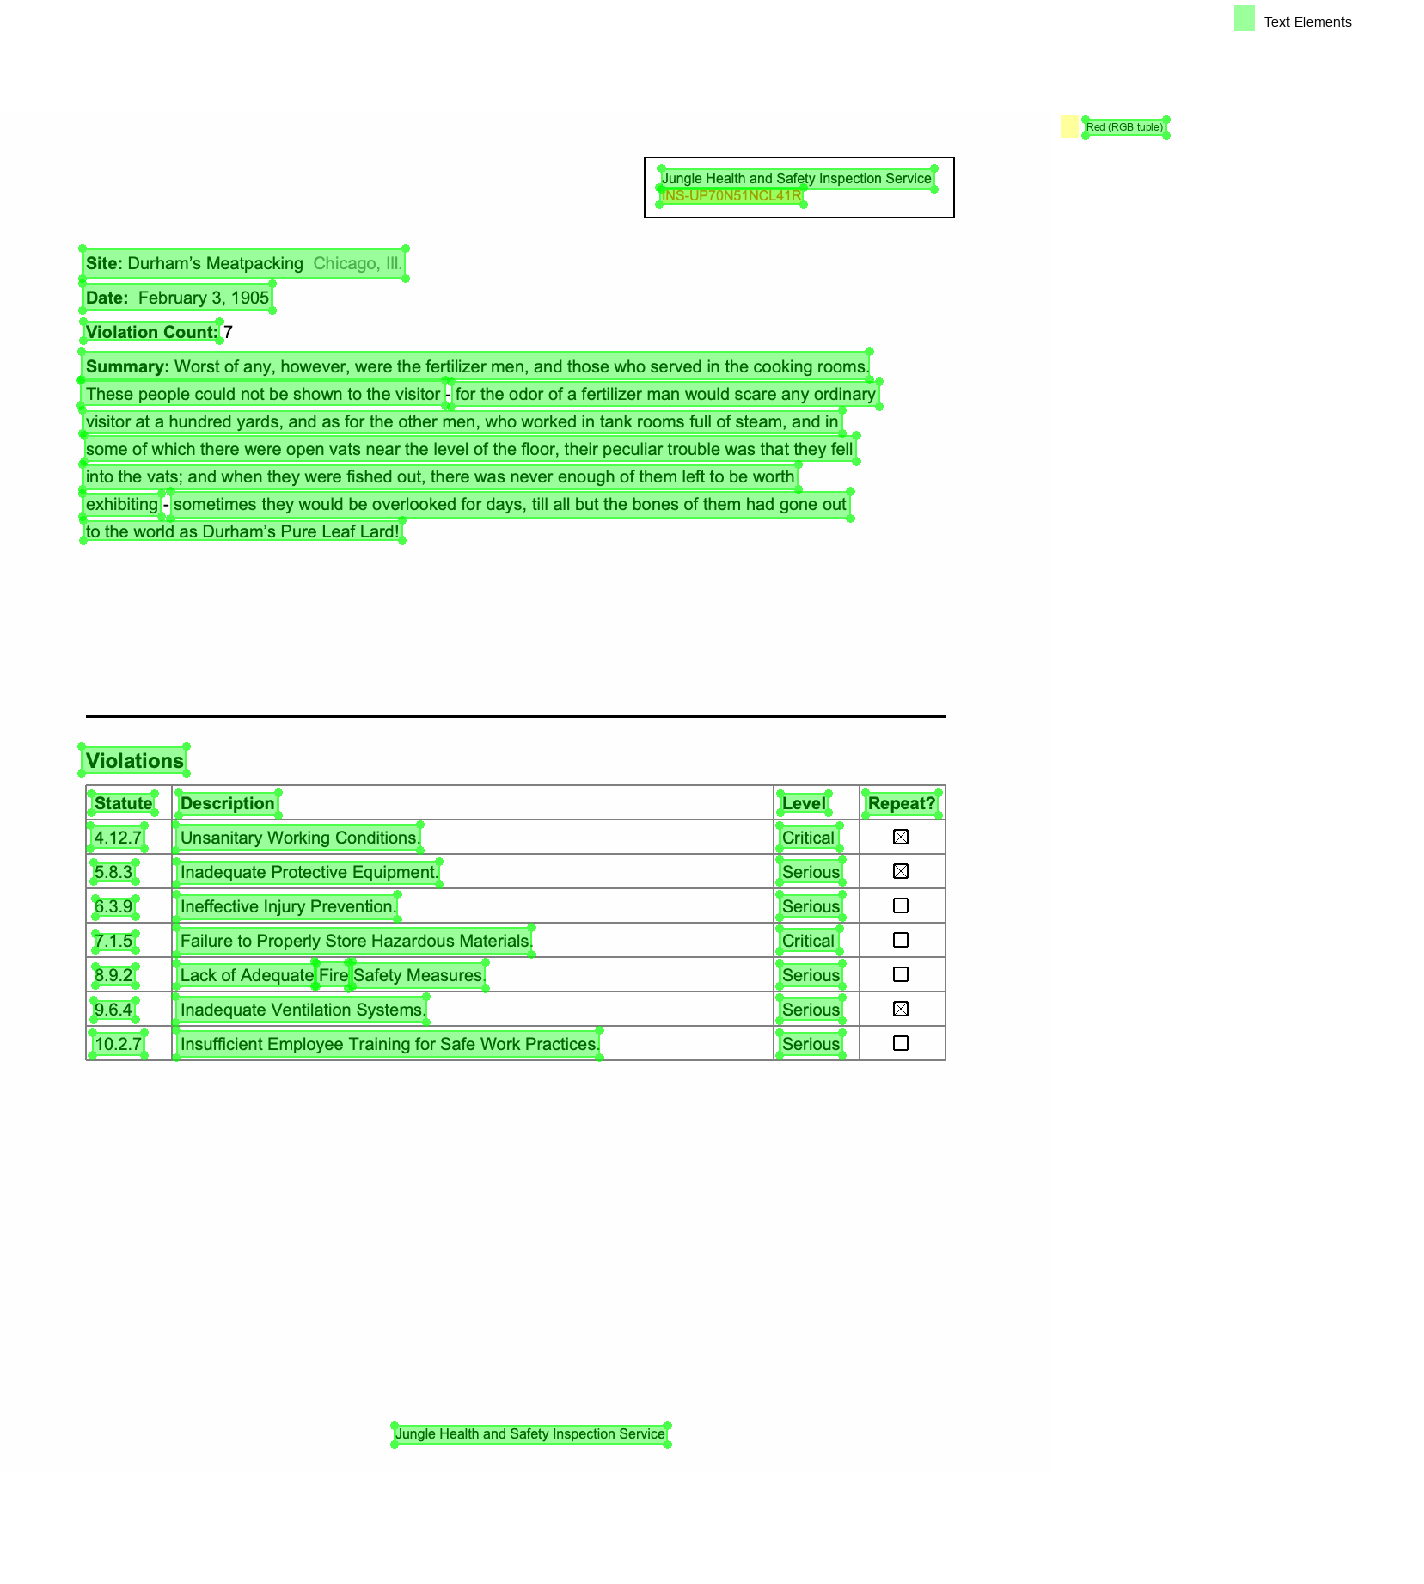

In [3]:
# Apply OCR using the default engine (EasyOCR) for English
page.apply_ocr(languages=['en'])

# Select all text pieces found by OCR
text_elements = page.find_all('text[source=ocr]')
print(f"Found {len(text_elements)} text elements using default OCR")

# Visualize the elements
text_elements.show()

In [4]:
# Apply OCR using PaddleOCR for English and Chinese
page.apply_ocr(engine='paddle', languages=['en', 'ch_sim'])

# Apply OCR using SuryaOCR for English and German
page.apply_ocr(engine='surya', languages=['en', 'de'])

text_with_ocr = page.extract_text()
print(f"\nExtracted text after OCR:\n{text_with_ocr[:150]}...")

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

[2025/05/06 11:40:24] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

Loaded detection model s3://text_detection/2025_02_18 on device mps with dtype torch.float16


Loaded recognition model s3://text_recognition/2025_02_18 on device mps with dtype torch.float16


Detecting bboxes:   0%|                                                                                                    | 0/1 [00:00<?, ?it/s]

Detecting bboxes: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.90it/s]

Detecting bboxes: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.90it/s]

Recognizing Text:   0%|                                                                                                    | 0/1 [00:00<?, ?it/s]

Recognizing Text: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.45s/it]

Recognizing Text: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.45s/it]


Extracted text after OCR:
Red (RGB tuple)
Jungle Health and Safety Inspection Service
INS-UP70N51NCL41R
Site: Durham's Meatpacking Chicago, III.
Date:  February 3, 1905
Violati...


## Advanced OCR Configuration

For more control, import and use the specific `Options` class for your chosen engine within the `apply_ocr` call.

In [5]:
from natural_pdf.ocr import PaddleOCROptions, EasyOCROptions, SuryaOCROptions

# Re-apply OCR using EasyOCR with specific options
easy_opts = EasyOCROptions(
    paragraph=False,
)
page.apply_ocr(engine='easyocr', languages=['en'], min_confidence=0.1, options=easy_opts)

paddle_opts = PaddleOCROptions(
    use_angle_cls=False,
    det_db_thresh=0.3,
)
page.apply_ocr(engine='paddle', languages=['en'], options=paddle_opts)

surya_opts = SuryaOCROptions()
page.apply_ocr(engine='surya', languages=['en'], min_confidence=0.5, detect_only=True, options=surya_opts)

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

Detecting bboxes:   0%|                                                                                                    | 0/1 [00:00<?, ?it/s]

Detecting bboxes: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.12it/s]

Detecting bboxes: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.12it/s]

<Page number=1 index=0>

## Interactive OCR Correction / Debugging

If OCR results aren't perfect, you can use the bundled interactive web application (SPA) to review and correct them.

1.  **Package the data:**
    After running `apply_ocr` (or `apply_layout`), use `create_correction_task_package` to create a zip file containing the PDF images and detected elements.

    ```python
    from natural_pdf.utils.packaging import create_correction_task_package

    page.apply_ocr()

    create_correction_task_package(pdf, "correction_package.zip", overwrite=True)
    ```

2.  **Run the SPA:**
    Navigate to the SPA directory within the installed `natural_pdf` library in your terminal and start a simple web server.

3.  **Use the SPA:**
    Open `http://localhost:8000` in your browser. Drag the `correction_package.zip` file onto the page to load the document. You can then click on text elements to correct the OCR results.

## Working with Multiple Pages

Apply OCR or layout analysis to all pages using the `PDF` object.

In [6]:
# Process all pages in the document

# Apply OCR to all pages (example using EasyOCR)
pdf.apply_ocr(engine='easyocr', languages=['en'])
print(f"Applied OCR to {len(pdf.pages)} pages.")

# Or apply layout analysis to all pages (example using Paddle)
# pdf.apply_layout(engine='paddle')
# print(f"Applied Layout Analysis to {len(pdf.pages)} pages.")

# Extract text from all pages (uses OCR results if available)
all_text_content = pdf.extract_text(page_separator="\\n\\n---\\n\\n")

print(f"\nCombined text from all pages:\n{all_text_content[:500]}...")

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

2025-05-06T15:41:10.547113Z [warning  ] Ignoring unsupported layout keyword argument: 'page_separator' lineno=64 module=natural_pdf.utils.text_extraction


[2025-05-06 11:41:10,547] [ WARNING] text_extraction.py:64 - Ignoring unsupported layout keyword argument: 'page_separator'


Applied OCR to 1 pages.

Combined text from all pages:
Red (RGB tuple )
Jungle Health and Safety Inspection Service
INS-UPZONS INCLAIR
Site: Durham's Meatpacking   Chicago, IIL.
Date: February 3, 1905
Violation Count:
Summary: Worst of any, however; were the fertilizer men, and those who served in the cooking rooms.
These people could not be shown to the visitorfor the odor of a fertilizer man would scare any ordinary
visitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam; and in
some of which there were open va...


## Saving PDFs with Searchable Text

After applying OCR to a PDF, you can save a new version of the PDF where the recognized text is embedded as an invisible layer. This makes the text searchable and copyable in standard PDF viewers.

Use the `save_searchable()` method on the `PDF` object:

In [7]:
from natural_pdf import PDF

input_pdf_path = "https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/needs-ocr.pdf"

pdf = PDF(input_pdf_path)
# Apply OCR to all pages before saving
# Use desired engine and options
pdf.apply_ocr(engine='easyocr', languages=['en'])

pdf.save_searchable("needs-ocr-searchable.pdf")

print("Saved searchable PDF to needs-ocr-searchable.pdf")

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

2025-05-06T15:41:10.823307Z [warning  ] Using CPU. Note: This module is much faster with a GPU. lineno=71 module=easyocr.easyocr


[2025-05-06 11:41:10,823] [ WARNING] easyocr.py:71 - Using CPU. Note: This module is much faster with a GPU.


2025-05-06T15:41:22.561816Z [warning  ] PDF.save_searchable() is deprecated. Use PDF.save_pdf(..., ocr=True) instead. lineno=790 module=natural_pdf.core.pdf


[2025-05-06 11:41:22,561] [ WARNING] pdf.py:790 - PDF.save_searchable() is deprecated. Use PDF.save_pdf(..., ocr=True) instead.


Saved searchable PDF to needs-ocr-searchable.pdf


This creates `needs-ocr-searchable.pdf`, which looks identical to the original but now has a text layer corresponding to the OCR results. You can adjust the rendering resolution used during saving with the `dpi` parameter (default is 300).

OCR integration enables you to work with scanned documents, historical archives, and image-based PDFs that don't have embedded text. By combining OCR with natural-pdf's layout analysis capabilities, you can turn any document into structured, searchable data. 